In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
label = df.groupby('label')
label.size()

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64

In [24]:
label.get_group('rice')

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [25]:
label[['humidity']].mean()

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [26]:
labels = list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [27]:
nitrogen = list(label[["N"]].mean().values.ravel())
nitrogen

[np.float64(20.8),
 np.float64(100.23),
 np.float64(40.02),
 np.float64(40.09),
 np.float64(21.98),
 np.float64(101.2),
 np.float64(117.77),
 np.float64(23.18),
 np.float64(78.4),
 np.float64(20.75),
 np.float64(18.77),
 np.float64(77.76),
 np.float64(20.07),
 np.float64(21.44),
 np.float64(20.99),
 np.float64(100.32),
 np.float64(19.58),
 np.float64(49.88),
 np.float64(20.73),
 np.float64(18.87),
 np.float64(79.89),
 np.float64(99.42)]

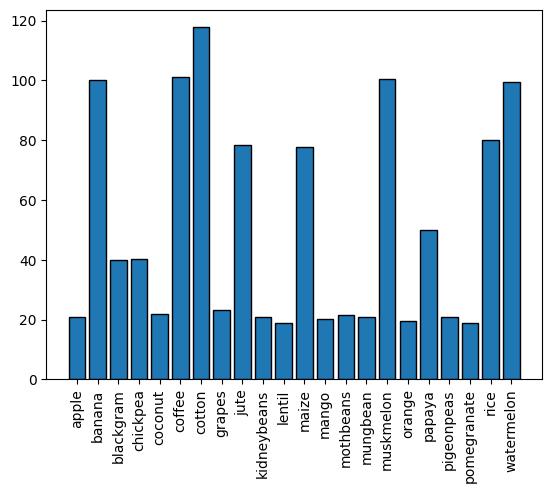

In [28]:
plt.bar(x=labels, height=nitrogen,ec="k")
plt.xticks(rotation=90)
plt.show()

In [29]:
x = df.drop("label", axis=1)

In [30]:
#standardscaler --- normalize the data ---- outliers se deal krne ke liye 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transformed = sc.fit_transform(x)
x_transformed.shape


(2200, 7)

In [31]:
desc = pd.DataFrame(x_transformed).describe()
desc.head()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01


In [32]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [33]:
desc_formatted = desc.applymap(lambda x: f"{int(x):d}")
desc_formatted.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_10596\1541474218.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x: f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0


In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(x_transformed)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [35]:
label = kmeans.labels_

In [36]:
df["cluster_8"] = label
df


,N,P,K,temperature,humidity,ph,rainfall,label,cluster_8
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,2
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,2
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,4


In [37]:
df["cluster_8"].value_counts()

cluster_8
1    429
4    356
2    312
3    285
0    220
5    200
7    200
6    198
Name: count, dtype: int64

In [38]:
df[df["label"] == "rice"]["cluster_8"].value_counts()

cluster_8
2    100
Name: count, dtype: int64

In [39]:
df[df["cluster_8"] == 1]["label"].value_counts()

label
blackgram     100
mungbean      100
lentil         94
mothbeans      58
papaya         42
mango          13
pigeonpeas     11
orange         11
Name: count, dtype: int64

In [40]:
#met
from sklearn.metrics import silhouette_score
#Range --- 1 to 1
silhouette_score(x_transformed, label)

0.32644568406485364

In [41]:
kmeans.inertia_

4842.123582070128

In [45]:
WCSS = {}
for i in range (5,51):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_transformed)
    WCSS[i] = kmeans.inertia_



In [46]:
WCSS


{5: 6913.400334579389,
 6: 6138.087439335349,
 7: 5248.724876199783,
 8: 5076.393746821644,
 9: 4479.204582871161,
 10: 4245.150213689734,
 11: 4137.1246689337295,
 12: 3608.98904352441,
 13: 3520.3579071408135,
 14: 3447.1587502318566,
 15: 3142.823857774699,
 16: 3071.887571052329,
 17: 2943.834031824433,
 18: 2662.4749806928507,
 19: 2666.6494731977727,
 20: 2462.4747525657767,
 21: 2323.0129045860904,
 22: 2282.4849025784183,
 23: 2156.0893039096104,
 24: 2074.395042101973,
 25: 2095.857379236202,
 26: 2027.648665960309,
 27: 1878.9173655803652,
 28: 1887.8453322004234,
 29: 1785.112505304651,
 30: 1774.8108120716665,
 31: 1705.7817530137258,
 32: 1674.738032323957,
 33: 1629.1969403019564,
 34: 1621.735436243598,
 35: 1591.5785314072814,
 36: 1522.8027544936967,
 37: 1524.0037588497078,
 38: 1544.6715225985722,
 39: 1554.7221873121039,
 40: 1423.822303414529,
 41: 1434.6904698135584,
 42: 1393.9661646037594,
 43: 1361.7970759271682,
 44: 1354.229326103231,
 45: 1372.2810478692213,

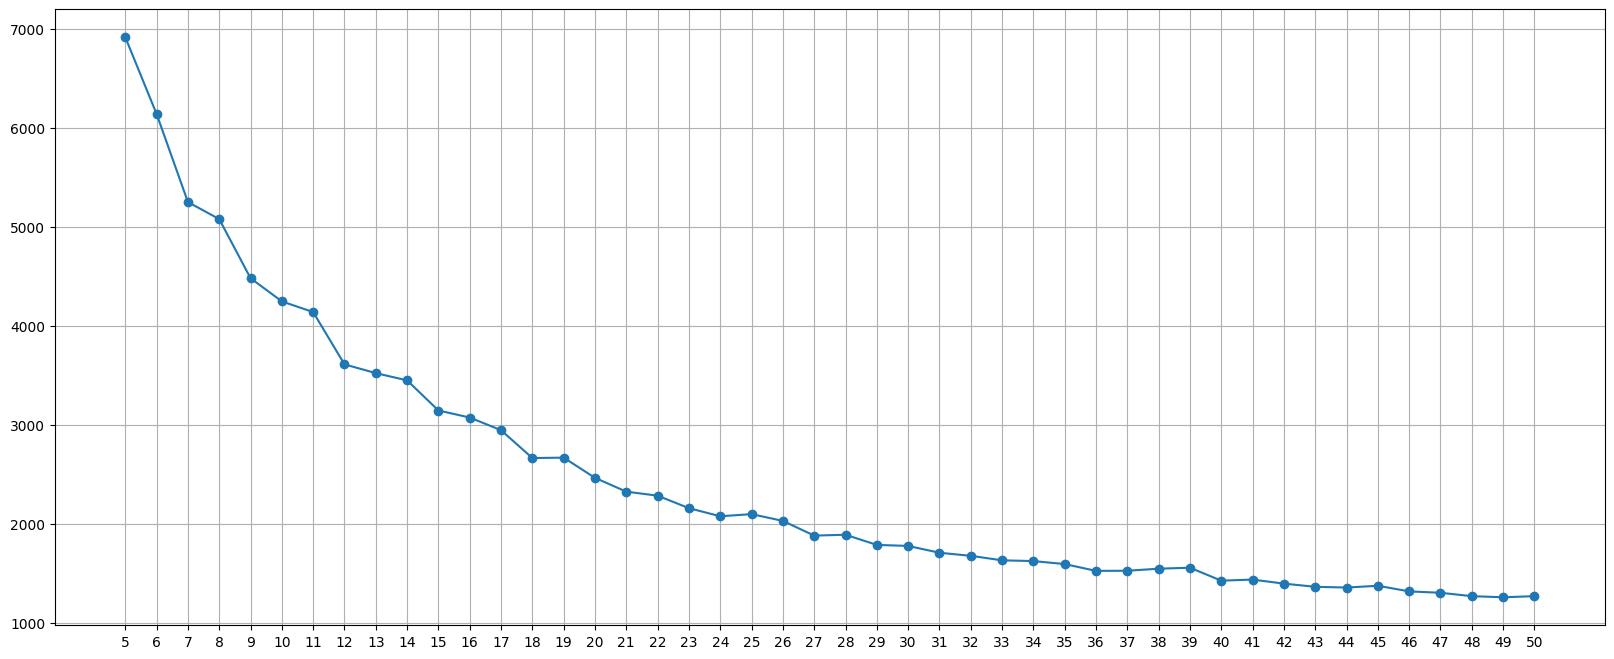

In [49]:
plt.figure(figsize = (20,8))
plt.plot(WCSS.keys(),WCSS.values(), marker = 'o')
## add a line
plt.xticks(list(WCSS.keys()))
plt.grid(True)
plt.show()

In [50]:
import joblib 
joblib.dump(kmeans, "crop_reco_kmeans.lb")

['crop_reco_kmeans.lb']

In [51]:
joblib.dump(sc, "scaler.lb")

['scaler.lb']

In [52]:
joblib.dump(df, "crop_reco_df.lb")

['crop_reco_df.lb']